In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cu113.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cu113.html
     |████████████████████████████████| 7.9 MB 33.2 MB/s 
     |████████████████████████████████| 3.5 MB 43.0 MB/s 
     |████████████████████████████████| 2.4 MB 45.1 MB/s 
     |████████████████████████████████| 709 kB 62.5 MB/s 
     |████████████████████████████████| 467 kB 27.3 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=08b3d967559eba9f2e3cddce79b73124b45ea5b4c2b0a51cfab1524039fc9376
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [ ]:
from torch_geometric.data import HeteroData
import numpy as np
import torch

data = HeteroData()

path = "/content/drive/MyDrive/MovieRecommendation/GAT/data"

data['movie'].x  = torch.from_numpy(np.load(path+'/embed_movie.npy'))
data['actor'].x  = torch.from_numpy(np.load(path+'/embed_actor.npy'))
data['director'].x  = torch.from_numpy(np.load(path+'/embed_director.npy'))
data['age'].x  = torch.from_numpy(np.load(path+'/embed_age.npy'))
data['genre'].x  = torch.from_numpy(np.load(path+'/embed_genre.npy'))
data['nation'].x  = torch.from_numpy(np.load(path+'/embed_nation.npy'))

print(data)

HeteroData(
  movie={ x=[2000, 768] },
  actor={ x=[7784, 768] },
  director={ x=[1205, 768] },
  age={ x=[12, 768] },
  genre={ x=[22, 768] },
  nation={ x=[50, 768] }
)


In [ ]:
import pandas as pd

age = pd.read_csv(path+'/edge_is_rated_age.txt', sep = ' ')
age = np.array(age.values.tolist())
age = torch.tensor(age.astype(np.int)).t().contiguous()
data['movie', 'is_rated_age', 'age'].edge_index = age

act = pd.read_csv(path+'/edge_act.txt', sep = ' ')
act = np.array(act.values.tolist())
act = torch.tensor(act.astype(np.int)).t().contiguous()
data['actor', 'act', 'movie'].edge_index = act

direct = pd.read_csv(path+'/edge_direct.txt', sep = ' ')
direct = np.array(direct.values.tolist())
direct = torch.tensor(direct.astype(np.int)).t().contiguous()
data['director', 'direct', 'movie'].edge_index = direct

genre = pd.read_csv(path+'/edge_is_in_genre.txt', sep = ' ')
genre = np.array(genre.values.tolist())
genre = torch.tensor(genre.astype(np.int)).t().contiguous()
data['movie', 'is_in_genre', 'genre'].edge_index = genre

nation = pd.read_csv(path+'/edge_made_in_nation.txt', sep = ' ')
nation = np.array(nation.values.tolist())
nation = torch.tensor(nation.astype(np.int)).t().contiguous()
data['movie', 'made_in_nation', 'nation'].edge_index = nation

print(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

HeteroData(
  movie={ x=[2000, 768] },
  actor={ x=[7784, 768] },
  director={ x=[1205, 768] },
  age={ x=[12, 768] },
  genre={ x=[22, 768] },
  nation={ x=[50, 768] },
  (movie, is_rated_age, age)={ edge_index=[2, 2961] },
  (actor, act, movie)={ edge_index=[2, 14418] },
  (director, direct, movie)={ edge_index=[2, 1994] },
  (movie, is_in_genre, genre)={ edge_index=[2, 4463] },
  (movie, made_in_nation, nation)={ edge_index=[2, 2479] }
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
import re

label = pd.read_csv(path+'/label_list.txt', sep = '\t')
movie_label = pd.read_csv(path+'/label_genre.txt', sep = '\t')
temp = list(map(int, re.sub(r"[\[\]]", "", label["labels"][1]).split(", ")))
temp = [1 if i in temp else 0 for i in range(22)]
# print(len(temp))
# print(temp)
temp = []
for l in label["labels"]:
  t = re.sub(r"[\[\]]", "", l).split(", ")
  if t[0] != "":
    t = list(map(int, t))
  else:
    t = []
  t = [1 if i in t else 0 for i in range(22)]
  temp.append(t)

# print(temp)

answer = []
for lab in movie_label["label"]:
  answer.append(temp[int(lab)])


answer = torch.tensor(answer)
print(answer)
data["movie"].y = answer
# print(answer)
# print(answer.shape)

# temp = [list(map(int, re.sub(r"[\[\]]", "", l).split(", "))) for l in label["labels"]]
# print(temp)

# label = np.array(label.values.tolist())
# label = torch.tensor(label.astype(np.int)).t().contiguous()[1]

print(data)
# print(label)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0]])
HeteroData(
  movie={
    x=[2000, 768],
    y=[2000, 22]
  },
  actor={ x=[7784, 768] },
  director={ x=[1205, 768] },
  age={ x=[12, 768] },
  genre={ x=[22, 768] },
  nation={ x=[50, 768] },
  (movie, is_rated_age, age)={ edge_index=[2, 2961] },
  (actor, act, movie)={ edge_index=[2, 14418] },
  (director, direct, movie)={ edge_index=[2, 1994] },
  (movie, is_in_genre, genre)={ edge_index=[2, 4463] },
  (movie, made_in_nation, nation)={ edge_index=[2, 2479] }
)


In [ ]:
import random
temp = [i for i in range(2000)]
random.shuffle(temp)

train_mask = [False for i in range(2000)]
valid_mask = [False for i in range(2000)]
test_mask = [False for i in range(2000)]

for j, i in enumerate(temp):
  if j < 1600:
    train_mask[i] = True
  elif j < 1800:
    valid_mask[i] = True
  else:
    test_mask[i] = True


data["movie"].train_mask = torch.tensor(train_mask)
data["movie"].val_mask = torch.tensor(valid_mask)
data["movie"].test_mask = torch.tensor(test_mask)

NUMCLASS = 22
print(NUMCLASS)

22


In [ ]:
print(train_mask)
print(valid_mask)
print(test_mask)

[True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, Fals

In [ ]:
import torch_geometric.transforms as T

data = T.ToUndirected()(data)
#data = T.AddSelfLoops()(data)
#data = T.NormalizeFeatures()(data)

print(data)

HeteroData(
  movie={
    x=[2000, 768],
    y=[2000, 22],
    train_mask=[2000],
    val_mask=[2000],
    test_mask=[2000]
  },
  actor={ x=[7784, 768] },
  director={ x=[1205, 768] },
  age={ x=[12, 768] },
  genre={ x=[22, 768] },
  nation={ x=[50, 768] },
  (movie, is_rated_age, age)={ edge_index=[2, 2961] },
  (actor, act, movie)={ edge_index=[2, 14418] },
  (director, direct, movie)={ edge_index=[2, 1994] },
  (movie, is_in_genre, genre)={ edge_index=[2, 4463] },
  (movie, made_in_nation, nation)={ edge_index=[2, 2479] },
  (age, rev_is_rated_age, movie)={ edge_index=[2, 2961] },
  (movie, rev_act, actor)={ edge_index=[2, 14418] },
  (movie, rev_direct, director)={ edge_index=[2, 1994] },
  (genre, rev_is_in_genre, movie)={ edge_index=[2, 4463] },
  (nation, rev_made_in_nation, movie)={ edge_index=[2, 2479] }
)


In [ ]:
print(data['movie'].x)

tensor([[ 2.0061e-02,  1.1399e-02, -4.9557e-01,  ..., -5.7112e-02,
          1.4089e-02,  3.9966e-02],
        [ 1.7557e-02,  1.4669e-02, -6.2961e-01,  ..., -3.6282e-02,
          5.1188e-02, -2.7295e-02],
        [ 3.4202e-02, -1.1871e-02, -3.1600e-01,  ...,  2.5435e-02,
         -5.0507e-04,  4.6632e-02],
        ...,
        [ 2.6428e-03,  2.5621e-02, -4.3013e-01,  ..., -6.1772e-02,
         -3.3588e-03,  3.9521e-02],
        [-5.2318e-02, -1.3269e-02, -5.7703e-01,  ..., -3.4845e-02,
         -4.8633e-02,  7.8522e-03],
        [-5.9738e-02, -6.4434e-03, -3.6663e-01,  ...,  1.5921e-02,
         -7.5789e-02, -1.4073e-02]])


In [ ]:
print(data.x_dict, data.edge_index_dict)

{'movie': tensor([[ 2.0061e-02,  1.1399e-02, -4.9557e-01,  ..., -5.7112e-02,
          1.4089e-02,  3.9966e-02],
        [ 1.7557e-02,  1.4669e-02, -6.2961e-01,  ..., -3.6282e-02,
          5.1188e-02, -2.7295e-02],
        [ 3.4202e-02, -1.1871e-02, -3.1600e-01,  ...,  2.5435e-02,
         -5.0507e-04,  4.6632e-02],
        ...,
        [ 2.6428e-03,  2.5621e-02, -4.3013e-01,  ..., -6.1772e-02,
         -3.3588e-03,  3.9521e-02],
        [-5.2318e-02, -1.3269e-02, -5.7703e-01,  ..., -3.4845e-02,
         -4.8633e-02,  7.8522e-03],
        [-5.9738e-02, -6.4434e-03, -3.6663e-01,  ...,  1.5921e-02,
         -7.5789e-02, -1.4073e-02]]), 'actor': tensor([[0.2720, 0.3348, 0.1570,  ..., 0.9093, 0.1776, 0.6180],
        [0.5908, 0.3077, 0.1083,  ..., 0.7695, 0.5961, 0.2496],
        [0.9284, 0.5966, 0.4689,  ..., 0.7570, 0.4779, 0.0585],
        ...,
        [0.1817, 0.0877, 0.3339,  ..., 0.5294, 0.8213, 0.5490],
        [0.7532, 0.9795, 0.3188,  ..., 0.9066, 0.1378, 0.7290],
        [0.7464

In [ ]:
from torch_geometric.nn import GATConv, Linear, to_hetero
import torch.nn.functional as F
import torch.nn as nn
import torch_geometric.transforms as T
from torch_geometric.datasets import OGB_MAG
from torch_geometric.nn import SAGEConv, to_hetero


class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

model = GNN(hidden_channels=64, out_channels=22)
model = to_hetero(model, data.metadata(), aggr='sum')

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GATConv(768, hidden_channels[0], add_self_loops=False, dropout=0.6)
        self.lin1 = Linear(-1, hidden_channels[0])
        self.conv2 = GATConv(hidden_channels[0], hidden_channels[1], add_self_loops=False, dropout=0.6)
        self.lin2 = Linear(-1, hidden_channels[1])
        self.conv3 = GATConv(hidden_channels[1], out_channels, add_self_loops=False, dropout=0.6)
        self.lin3 = Linear(-1, out_channels)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index) + self.lin1(x)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index) + self.lin2(x)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv3(x, edge_index) + self.lin3(x)
        x = x.sigmoid()
        return x

# model = GAT(hidden_channels=[384, 96], out_channels=NUMCLASS)
# model = to_hetero(model, data.metadata(), aggr='sum')

In [ ]:
import torch.nn.functional as F


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


with torch.no_grad():  # Initialize lazy modules.
     out = model(data.x_dict, data.edge_index_dict)



def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict, data.edge_index_dict)
    mask = data['movie'].train_mask
    loss = criterion(out['movie'][mask], data['movie'].y[mask].float())
    loss.backward()
    optimizer.step()
    return float(loss)

losses = []
losses2 = []
model.train()
vlossL = 999
for epoch in range(400):
    loss = train()
    losses.append(loss)
    with torch.no_grad():
      out = model(data.x_dict, data.edge_index_dict)
      mask = data['movie'].val_mask.to(device)
      vloss = criterion(out['movie'][mask], data['movie'].y[mask].float())
      losses2.append(vloss.detach().cpu())
    print(f"{epoch}-epoch and {loss}-train_loss {vloss}-valid_loss\n")
    if(vloss > vlossL and vloss < 0.005):break
    else:vlossL = vloss
    

0-epoch and 0.7928274869918823-train_loss 4.004863262176514-valid_loss

1-epoch and 4.489349365234375-train_loss 6.408749103546143-valid_loss

2-epoch and 6.297093391418457-train_loss 4.728341102600098-valid_loss

3-epoch and 4.605349063873291-train_loss 7.054765701293945-valid_loss

4-epoch and 6.996011257171631-train_loss 4.202011585235596-valid_loss

5-epoch and 4.274713039398193-train_loss 2.7160794734954834-valid_loss

6-epoch and 2.8457016944885254-train_loss 3.166031837463379-valid_loss

7-epoch and 3.277921199798584-train_loss 2.5446817874908447-valid_loss

8-epoch and 2.6348354816436768-train_loss 1.936611294746399-valid_loss

9-epoch and 2.0423455238342285-train_loss 1.42731773853302-valid_loss

10-epoch and 1.581735610961914-train_loss 1.4774041175842285-valid_loss

11-epoch and 1.683626651763916-train_loss 1.3371950387954712-valid_loss

12-epoch and 1.5545070171356201-train_loss 1.0092871189117432-valid_loss

13-epoch and 1.2104839086532593-train_loss 0.9261347055435181-val

In [ ]:
model.eval()
with torch.no_grad():
  out = model(data.x_dict, data.edge_index_dict)
  pred = out['movie']
  print(pred.shape)
  #print(pred)


  


  #s = nn.Sigmoid()
  #pred = s(pred)
  pred = pred > 0.5
  pred = pred.float()

  count = 0
  for i, p in enumerate(pred):
    
    if p.eq(data['movie'].y[i]).sum().item() == 22 and data['movie'].test_mask[i]: 
      count+=1
      print(i, p,data['movie'].y[i])


  #print((pred))
  #correct = float (pred[data['movie'].test_mask].eq(data['movie'].y[data['movie'].test_mask]).sum().item())
  #acc = correct / data['movie'].test_mask.sum().item()
  acc = count / data['movie'].test_mask.sum().item()
  print('Accuracy: {:.4f}'.format(acc))

  #correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
  #acc = correct / data.test_mask.sum().item()
  #print('Accuracy: {:.4f}'.format(acc))

torch.Size([2000, 22])
8 tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0') tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
9 tensor([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0') tensor([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
11 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0') tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
15 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0') tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')
25 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,


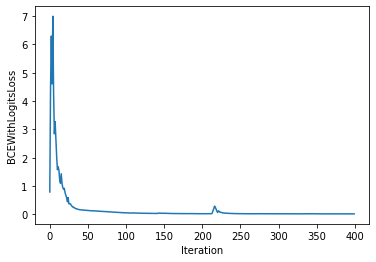

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(losses))], losses)
plt.xlabel('Iteration')
plt.ylabel('BCEWithLogitsLoss')
plt.show()

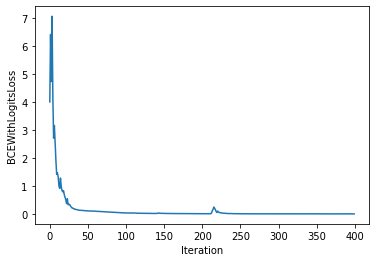

In [ ]:

plt.plot([i for i in range(len(losses2))], losses2)
plt.xlabel('Iteration')
plt.ylabel('BCEWithLogitsLoss')
plt.show()

In [ ]:


model.eval()
with torch.no_grad():
  out = model(data.x_dict, data.edge_index_dict)
  pred = out['movie'].cpu().numpy()
  print(pred.shape)
  np.save('./embed_movie_learned', pred)

In [ ]:
np_load = np.load('./embed_movie_learned.npy')
result = torch.from_numpy(np_load)
print(result.shape)
print(result[0])

In [ ]:
import networkx as nx
import torch
import numpy as np
import pandas as pd
from torch_geometric.datasets import Planetoid
from torch_geometric.utils.convert import to_networkx

dataset1 = Planetoid(root = '/content/cora',name='Cora')

cora = dataset1 [0]

coragraph = to_networkx(cora)

node_labels = cora.y[list(coragraph.nodes)].numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(14,12)) 
nx.draw(coragraph, cmap=plt.get_cmap('Set1'),node_color = node_labels,node_size=75,linewidths=6)
plt.show()

In [ ]:
print((dataset1[0]))

In [ ]:
from sklearn.manifold import TSNE

# class target 정보 제외
train_df = data["movie"].x

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])



In [ ]:
import matplotlib.cm as cm

color_labels = pd.read_csv(path+"/label_genre.txt", sep="\t")
colors = cm.rainbow(np.linspace(0, 1, 357))

for i, c in enumerate(color_labels["label"]):
  plt.scatter(tsne_df['component 0'][i], tsne_df['component 1'][i], color = colors[c], label = str(c))
  #if i == 50: break

plt.figure(1,figsize=(14,12)) 
plt.xlabel('component 0')
plt.ylabel('component 1')
#plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/MovieRecommendation/GAT/data"
nontrain = torch.from_numpy(np.load('/content/drive/MyDrive/MovieRecommendation/GAT/data/embed_movie_learned.npy'))
# class target 정보 제외
train_df = nontrain
# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])



color_labels = pd.read_csv(path+"/label_genre.txt", sep="\t")
colors = cm.rainbow(np.linspace(0, 1, 357))

for i, c in enumerate(color_labels["label"]):
  plt.scatter(tsne_df['component 0'][i], tsne_df['component 1'][i], color = colors[c], label = str(c))
  #if i == 50: break

plt.figure(1,figsize=(14,12)) 
plt.xlabel('component 0')
plt.ylabel('component 1')
#plt.legend()
plt.show()

Gat 예제


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [ ]:
befor = dataset[0]['edge_index'].detach().clone()
print(dataset[0])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    print('loss: {:.4f}'.format(loss))

In [ ]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

In [ ]:
print(torch.equal(dataset[0]['edge_index'], befor))